In [3]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# MPC import
import numpy as np
from MPCVelControl_D3_1 import MPCVelControl

from MPCControl_xvel_D3_1 import MPCControl_xvel
from MPCControl_xvel_D3_1 import MPCControl_xvel_tuned_default
from MPCControl_xvel_D3_1 import MPCControl_xvel_tuned_final

from MPCControl_yvel_D3_1 import MPCControl_yvel
from MPCControl_yvel_D3_1 import MPCControl_yvel_tuned_default
from MPCControl_yvel_D3_1 import MPCControl_yvel_tuned_final

from MPCControl_zvel_D3_1 import MPCControl_zvel
from MPCControl_zvel_D3_1 import MPCControl_zvel_tuned_default
from MPCControl_zvel_D3_1 import MPCControl_zvel_tuned_final

from MPCControl_roll_D3_1 import MPCControl_roll
from MPCControl_roll_D3_1 import MPCControl_roll_tuned_default
from MPCControl_roll_D3_1 import MPCControl_roll_tuned_final

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [5]:
import matplotlib.pyplot as plt
from plot_style import set_mpc_style
set_mpc_style()

Ts = 0.05
sim_time = 7.0
H = 5.0
N = int(H / Ts)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

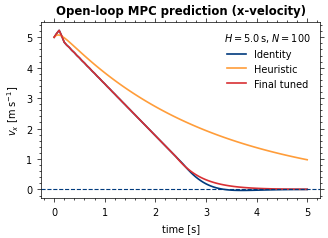

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

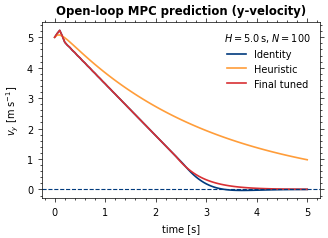

Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.


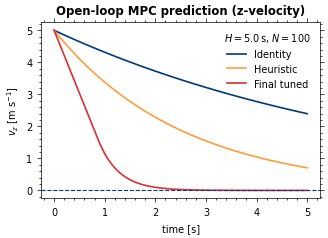

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Iteration 14... not yet converged

Iteration 15... not yet converged

Iteration 16... not yet converged

Iteration 17... not yet converged

Iteration 18... not yet converged

Iteration 19... not yet converged

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Ite

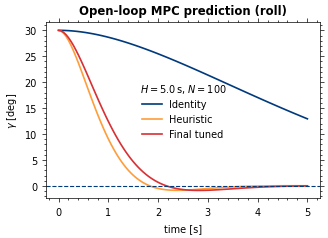

In [6]:
# Open-loop MPC prediction for x-velocity controller
# --- build three controllers ---
mpc_x_I   = MPCControl_xvel(A, B, xs, us, Ts, H)
mpc_x_td  = MPCControl_xvel_tuned_default(A, B, xs, us, Ts, H)
mpc_x_tf  = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)

x0_x = xs.copy()
x0_x[6] += 5.0  # v_x = 5 m/s

_, xI,  _ = mpc_x_I.get_u(x0_x[mpc_x_I.x_ids])
_, xTD, _ = mpc_x_td.get_u(x0_x[mpc_x_td.x_ids])
_, xTF, _ = mpc_x_tf.get_u(x0_x[mpc_x_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts

vx_local_idx = 2  # for x_ids=[1,4,6] -> [w_y, beta, v_x]

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vx_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vx_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vx_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_x$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (x-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()

# Open-loop MPC prediction for y-velocity controller
mpc_y_I  = MPCControl_yvel(A, B, xs, us, Ts, H)
mpc_y_td = MPCControl_yvel_tuned_default(A, B, xs, us, Ts, H)
mpc_y_tf = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)

x0_y = xs.copy()
x0_y[7] += 5.0

_, xI,  _ = mpc_y_I.get_u(x0_y[mpc_y_I.x_ids])
_, xTD, _ = mpc_y_td.get_u(x0_y[mpc_y_td.x_ids])
_, xTF, _ = mpc_y_tf.get_u(x0_y[mpc_y_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
vy_local_idx = list(mpc_y_I.x_ids).index(7)

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vy_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vy_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vy_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_y$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (y-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()

# Open-loop MPC prediction for z-velocity controller
mpc_z_I  = MPCControl_zvel(A, B, xs, us, Ts, H)
mpc_z_td = MPCControl_zvel_tuned_default(A, B, xs, us, Ts, H)
mpc_z_tf = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)

x0_z = xs.copy()
x0_z[8] += 5.0

_, xI,  _ = mpc_z_I.get_u(x0_z[mpc_z_I.x_ids])
_, xTD, _ = mpc_z_td.get_u(x0_z[mpc_z_td.x_ids])
_, xTF, _ = mpc_z_tf.get_u(x0_z[mpc_z_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
vz_local_idx = list(mpc_z_I.x_ids).index(8)

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, xI[vz_local_idx, :],  label="Identity")
plt.plot(t_ol, xTD[vz_local_idx, :], label=r"Heuristic")
plt.plot(t_ol, xTF[vz_local_idx, :], label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$v_z$ [m s$^{-1}$]")
plt.title("Open-loop MPC prediction (z-velocity)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()


# Open-loop MPC prediction for roll-rate controller
mpc_r_I  = MPCControl_roll(A, B, xs, us, Ts, H)
mpc_r_td = MPCControl_roll_tuned_default(A, B, xs, us, Ts, H)
mpc_r_tf = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)

x0_gamma = xs.copy()
x0_gamma[5] = np.deg2rad(30)   # γ = 30°

_, xI,  _ = mpc_r_I.get_u(x0_gamma[mpc_r_I.x_ids])
_, xTD, _ = mpc_r_td.get_u(x0_gamma[mpc_r_td.x_ids])
_, xTF, _ = mpc_r_tf.get_u(x0_gamma[mpc_r_tf.x_ids])

t_ol = np.arange(xI.shape[1]) * Ts
gamma_idx = 1  # local index in [ω_z, γ]

plt.figure(figsize=(3.4, 2.5))
plt.plot(t_ol, np.rad2deg(xI[gamma_idx]),  label="Identity")
plt.plot(t_ol, np.rad2deg(xTD[gamma_idx]), label=r"Heuristic")
plt.plot(t_ol, np.rad2deg(xTF[gamma_idx]), label="Final tuned")
plt.axhline(0.0, linestyle="--", linewidth=0.8)
plt.xlabel(r"time [s]")
plt.ylabel(r"$\gamma$ [deg]")
plt.title("Open-loop MPC prediction (roll)")
plt.legend(
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    frameon=False,
    fontsize=7,
    title_fontsize=7
)
plt.tight_layout()
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Maximum invariant set successfully computed after 14 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... n

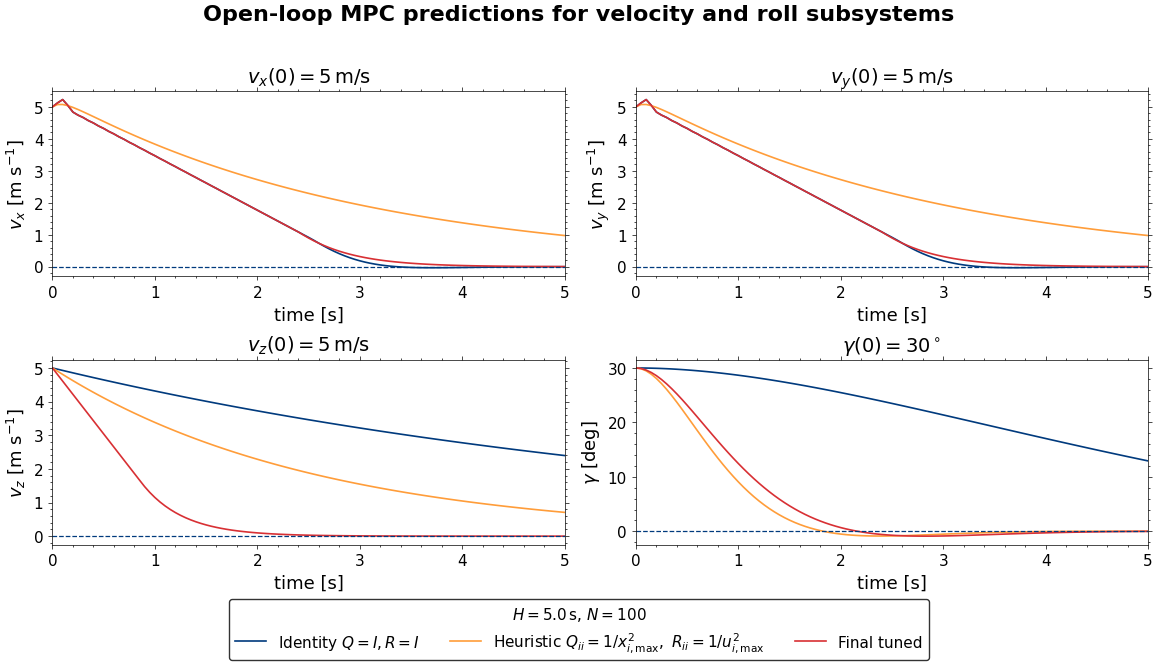

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- helper ----------
def run_open_loop(mpc_cls, A, B, xs, us, Ts, H, x0_full, state_full_idx,
                  y_transform=lambda y: y):
    mpc = mpc_cls(A, B, xs, us, Ts, H)
    x0_sub = x0_full[mpc.x_ids]
    _, x_ol, _ = mpc.get_u(x0_sub)

    t = np.arange(x_ol.shape[1]) * Ts
    local_idx = list(mpc.x_ids).index(state_full_idx)
    y = y_transform(x_ol[local_idx, :])
    return t, y


# ---------- initial conditions ----------
x0_x = xs.copy(); x0_x[6] += 5.0
x0_y = xs.copy(); x0_y[7] += 5.0
x0_z = xs.copy(); x0_z[8] += 5.0
x0_r = xs.copy(); x0_r[5]  = np.deg2rad(30.0)

# ---------- controller sets ----------
ctrl_sets = {
    "Identity $Q=I,R=I$": (
        MPCControl_xvel, MPCControl_yvel,
        MPCControl_zvel, MPCControl_roll
    ),
    r"Heuristic $Q_{ii}=1/x_{i,\max}^2,\ R_{ii}=1/u_{i,\max}^2$": (
        MPCControl_xvel_tuned_default,
        MPCControl_yvel_tuned_default,
        MPCControl_zvel_tuned_default,
        MPCControl_roll_tuned_default
    ),
    "Final tuned": (
        MPCControl_xvel_tuned_final,
        MPCControl_yvel_tuned_final,
        MPCControl_zvel_tuned_final,
        MPCControl_roll_tuned_final
    ),
}

# ---------- figure ----------
fig, axs = plt.subplots(2, 2, figsize=(11.69, 6.8))

fig.suptitle(
    "Open-loop MPC predictions for velocity and roll subsystems",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

LABEL_FONTSIZE = 13
TICK_FONTSIZE  = 11
TITLE_FONTSIZE = 14
LEGEND_FONTSIZE = 11

def format_ax(ax, title, ylabel):
    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight="bold")
    ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
    ax.set_ylabel(ylabel, fontsize=LABEL_FONTSIZE)
    ax.axhline(0.0, linestyle="--", linewidth=0.9)
    ax.set_xlim(0, H)
    ax.tick_params(labelsize=TICK_FONTSIZE)

# ---------- X velocity ----------
ax = axs[0, 0]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cx, A, B, xs, us, Ts, H, x0_x, 6)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_x(0)=5\,\mathrm{m/s}$", r"$v_x$ [m s$^{-1}$]")

# ---------- Y velocity ----------
ax = axs[0, 1]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cy, A, B, xs, us, Ts, H, x0_y, 7)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_y(0)=5\,\mathrm{m/s}$", r"$v_y$ [m s$^{-1}$]")

# ---------- Z velocity ----------
ax = axs[1, 0]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cz, A, B, xs, us, Ts, H, x0_z, 8)
    ax.plot(t, y, label=lbl)
format_ax(ax, r"$v_z(0)=5\,\mathrm{m/s}$", r"$v_z$ [m s$^{-1}$]")

# ---------- Roll angle ----------
ax = axs[1, 1]
for lbl, (cx, cy, cz, cr) in ctrl_sets.items():
    t, y = run_open_loop(cr, A, B, xs, us, Ts, H, x0_r, 5, np.rad2deg)
    ax.plot(t, y, label=lbl)
ax.set_title(r"$\gamma(0)=30^\circ$", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
ax.set_ylabel(r"$\gamma$ [deg]", fontsize=LABEL_FONTSIZE)
ax.axhline(0.0, linestyle="--", linewidth=0.9)
ax.set_xlim(0, H)
ax.tick_params(labelsize=TICK_FONTSIZE)

# ---------- legend ----------
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=3,
    fontsize=LEGEND_FONTSIZE,
    frameon=True,
    fancybox=True,
    edgecolor="black",
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    title_fontsize=LEGEND_FONTSIZE
)

plt.tight_layout(rect=[0, 0.10, 1, 0.95])

# ---------- save ----------
fig.savefig("openloop_mpc_2x2_a4wide.pdf", bbox_inches="tight")
plt.show()


In [8]:
mpc = MPCVelControl().new_controller(rocket, Ts, H)

x0 = xs.copy()
x0[6] += 5.0  # v_x
x0[7] += 5.0  # v_y
x0[8] += 5.0  # v_z

# ---------- open-loop simulation ----------
t0 = 0.0
u, x_ol, u_ol, t_ol = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0

vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol)

# # ---------- closed-loop simulation ----------

x1 = rocket.simulate_step(x0, Ts, u, method='nonlinear')
t_cl, x_cl, u_cl, t_ol_cl, x_ol_cl, u_ol_cl, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    T_ol=t_ol_cl[..., :-1],
    X_ol=x_ol_cl,
    U_ol=u_ol_cl,
)

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet co

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 

/Users/mt/opt/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating time 2.20: 
Simulating time 2.25: 
Simulating time 2.30: 
Simulating time 2.35: 
Simulating

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

{'fig': <Figure size 330x250 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1892eb4a0>,
 'scene_objects': {'rocket_actor': Actor (0x189420c40)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.212E+0

Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet c

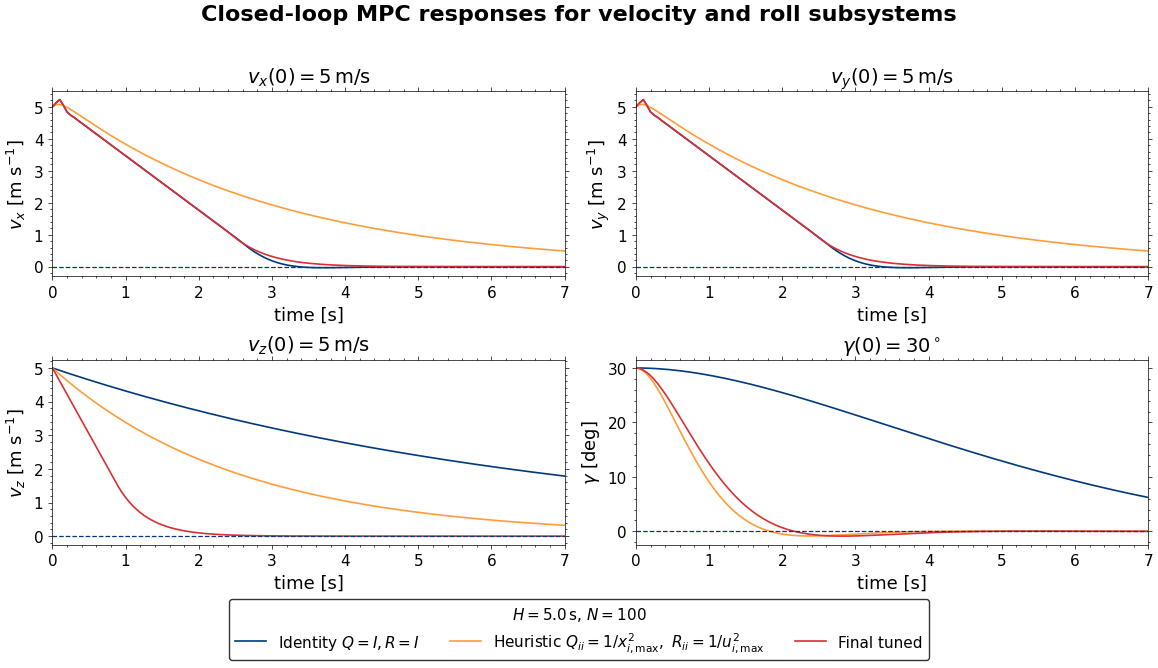

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Make 3 MPCVelControl variants
# -----------------------------
from LinearMPC_template.MPCVelControl import MPCVelControl

class MPCVelControl_I(MPCVelControl):
    def new_controller(self, rocket, Ts, H):
        xs, us = rocket.trim()
        A, B = rocket.linearize(xs, us)
        self.xs, self.us = xs, us

        self.mpc_x    = MPCControl_xvel(A, B, xs, us, Ts, H)
        self.mpc_y    = MPCControl_yvel(A, B, xs, us, Ts, H)
        self.mpc_z    = MPCControl_zvel(A, B, xs, us, Ts, H)
        self.mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H)
        return self

class MPCVelControl_TD(MPCVelControl):
    def new_controller(self, rocket, Ts, H):
        xs, us = rocket.trim()
        A, B = rocket.linearize(xs, us)
        self.xs, self.us = xs, us

        self.mpc_x    = MPCControl_xvel_tuned_default(A, B, xs, us, Ts, H)
        self.mpc_y    = MPCControl_yvel_tuned_default(A, B, xs, us, Ts, H)
        self.mpc_z    = MPCControl_zvel_tuned_default(A, B, xs, us, Ts, H)
        self.mpc_roll = MPCControl_roll_tuned_default(A, B, xs, us, Ts, H)
        return self

class MPCVelControl_TF(MPCVelControl):
    def new_controller(self, rocket, Ts, H):
        xs, us = rocket.trim()
        A, B = rocket.linearize(xs, us)
        self.xs, self.us = xs, us

        self.mpc_x    = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)
        self.mpc_y    = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)
        self.mpc_z    = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)
        self.mpc_roll = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)
        return self


# -----------------------------
# 2) Helper: run closed-loop and return trajectories
# -----------------------------
def run_closed_loop(mpc_full_cls, rocket, Ts, H, sim_time, x0_full, method="linear"):
    mpc = mpc_full_cls().new_controller(rocket, Ts, H)
    t_cl, x_cl, u_cl, *_ = rocket.simulate_control(
        mpc, sim_time, H, x0_full, method=method
    )
    return t_cl, x_cl, u_cl


# -----------------------------
# 3) Closed-loop initial conditions (ONE AT A TIME)
# -----------------------------
x0_x = xs.copy(); x0_x[6] += 5.0
x0_y = xs.copy(); x0_y[7] += 5.0
x0_z = xs.copy(); x0_z[8] += 5.0
x0_r = xs.copy(); x0_r[5]  = np.deg2rad(30.0)


# -----------------------------
# 4) Controller sets (full closed-loop MPC)
# -----------------------------
ctrl_sets_cl = {
    "Identity $Q=I,R=I$": MPCVelControl_I,
    r"Heuristic $Q_{ii}=1/x_{i,\max}^2,\ R_{ii}=1/u_{i,\max}^2$": MPCVelControl_TD,
    "Final tuned": MPCVelControl_TF,
}


# -----------------------------
# 5) Figure (2x2, A4-wide)
# -----------------------------
fig, axs = plt.subplots(2, 2, figsize=(11.69, 6.8))

fig.suptitle(
    "Closed-loop MPC responses for velocity and roll subsystems",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

LABEL_FONTSIZE = 13
TICK_FONTSIZE  = 11
TITLE_FONTSIZE = 14
LEGEND_FONTSIZE = 11

def format_ax(ax, title, ylabel):
    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight="bold")
    ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
    ax.set_ylabel(ylabel, fontsize=LABEL_FONTSIZE)
    ax.axhline(0.0, linestyle="--", linewidth=0.9)
    ax.set_xlim(0, sim_time)
    ax.tick_params(labelsize=TICK_FONTSIZE)


# --- X: start v_x=5 ---
ax = axs[0, 0]
for lbl, mpc_cls in ctrl_sets_cl.items():
    t, x, _ = run_closed_loop(mpc_cls, rocket, Ts, H, sim_time, x0_x)
    ax.plot(t, x[6, :], label=lbl)
format_ax(ax, r"$v_x(0)=5\,\mathrm{m/s}$", r"$v_x$ [m s$^{-1}$]")

# --- Y: start v_y=5 ---
ax = axs[0, 1]
for lbl, mpc_cls in ctrl_sets_cl.items():
    t, x, _ = run_closed_loop(mpc_cls, rocket, Ts, H, sim_time, x0_y)
    ax.plot(t, x[7, :], label=lbl)
format_ax(ax, r"$v_y(0)=5\,\mathrm{m/s}$", r"$v_y$ [m s$^{-1}$]")

# --- Z: start v_z=5 ---
ax = axs[1, 0]
for lbl, mpc_cls in ctrl_sets_cl.items():
    t, x, _ = run_closed_loop(mpc_cls, rocket, Ts, H, sim_time, x0_z)
    ax.plot(t, x[8, :], label=lbl)
format_ax(ax, r"$v_z(0)=5\,\mathrm{m/s}$", r"$v_z$ [m s$^{-1}$]")

# --- Roll: start gamma=30deg ---
ax = axs[1, 1]
for lbl, mpc_cls in ctrl_sets_cl.items():
    t, x, _ = run_closed_loop(mpc_cls, rocket, Ts, H, sim_time, x0_r)
    ax.plot(t, np.rad2deg(x[5, :]), label=lbl)

ax.set_title(r"$\gamma(0)=30^\circ$", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.set_xlabel(r"time [s]", fontsize=LABEL_FONTSIZE)
ax.set_ylabel(r"$\gamma$ [deg]", fontsize=LABEL_FONTSIZE)
ax.axhline(0.0, linestyle="--", linewidth=0.9)
ax.set_xlim(0, sim_time)
ax.tick_params(labelsize=TICK_FONTSIZE)


# -----------------------------
# 6) Legend + save
# -----------------------------
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=3,
    fontsize=LEGEND_FONTSIZE,
    frameon=True,
    fancybox=True,
    edgecolor="black",
    title=fr"$H={H}\,$s, $N={int(H/Ts)}$",
    title_fontsize=LEGEND_FONTSIZE
)

plt.tight_layout(rect=[0, 0.10, 1, 0.95])
fig.savefig("closedloop_mpc_2x2_a4wide.pdf", bbox_inches="tight")
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet co

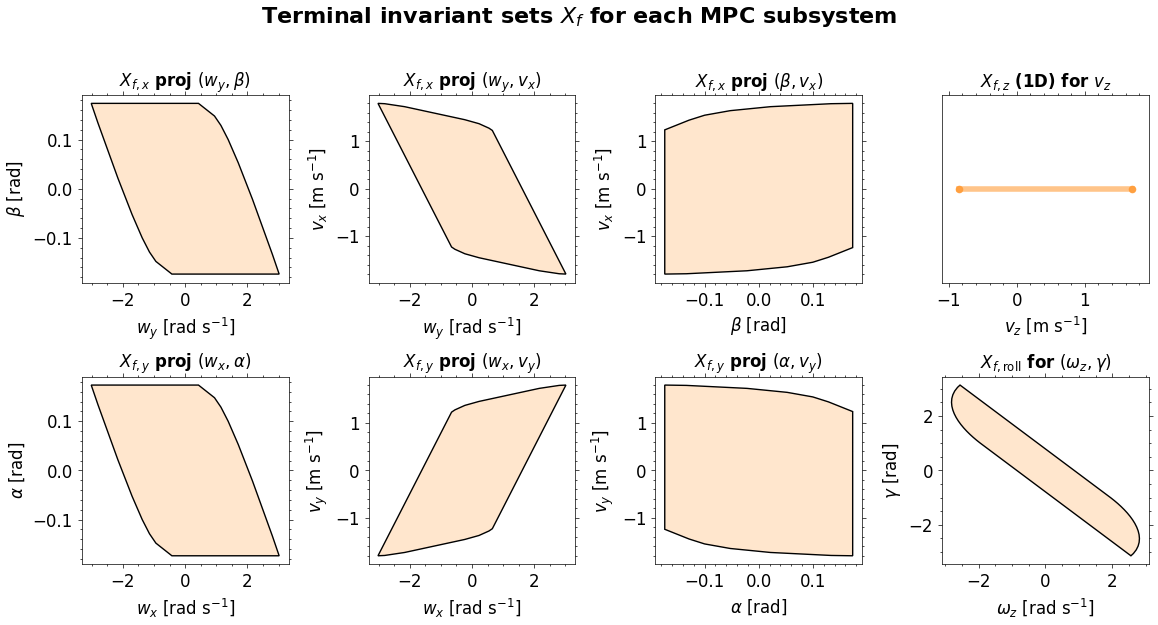

In [10]:
# Plot invariant sets of the final tuned x-velocity MPC controller

mpc_x = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)
mpc_y = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)
mpc_z = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)
mpc_r = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)

Xf_x = mpc_x.Xf
Xf_y = mpc_y.Xf
Xf_z = mpc_z.Xf
Xf_r = mpc_r.Xf

# colors from your palette
COL_XF = "#ff9d3a"   # orange for Xf
ALPHA  = 0.25
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 12
TITLE_SIZE = 12

def plot_poly(ax, P, color=COL_XF, alpha=ALPHA, label=None):
    # mpt4py uses "opacity" rather than alpha
    P.plot(ax, color=color, opacity=alpha, show_vertices=False, label=label)

def plot_1d_interval(ax, P1d, label=None, color=COL_XF):
    """
    Robust 1D plotting: compute bounds from H-rep (A x <= b) assuming bounded interval.
    """
    A = P1d.A
    b = P1d.b

    # inequalities: a_i x <= b_i
    # For 1D, each row is scalar.
    # Upper bounds come from a>0: x <= b/a
    # Lower bounds come from a<0: x >= b/a (since a<0 flips)
    upper = []
    lower = []
    for ai, bi in zip(A.reshape(-1), b.reshape(-1)):
        if ai > 1e-12:
            upper.append(bi / ai)
        elif ai < -1e-12:
            lower.append(bi / ai)  # note ai negative -> bound is lower
    xmin = max(lower) if lower else -np.inf
    xmax = min(upper) if upper else  np.inf

    ax.plot([xmin, xmax], [0, 0], color=color, linewidth=4, alpha=0.6, label=label)
    ax.scatter([xmin, xmax], [0, 0], color=color, s=20, alpha=0.9)
    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlim(xmin - 0.1*abs(xmax-xmin), xmax + 0.1*abs(xmax-xmin))

# ---- figure layout: A4 landscape-ish
fig, axs = plt.subplots(2, 4, figsize=(11.69, 6.8))  # A4 wide

fig.suptitle("Terminal invariant sets $X_f$ for each MPC subsystem",
             fontsize=16, fontweight="bold", y=0.98)

# ===== X subsystem (3D) projections
axs[0,0].set_title(r"$X_{f,x}$ proj $(w_y,\beta)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,0], Xf_x.projection(dims=(0,1)))
axs[0,0].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[0,0].set_ylabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE)

axs[0,1].set_title(r"$X_{f,x}$ proj $(w_y,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,1], Xf_x.projection(dims=(0,2)))
axs[0,1].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[0,1].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[0,2].set_title(r"$X_{f,x}$ proj $(\beta,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,2], Xf_x.projection(dims=(1,2)))
axs[0,2].set_xlabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[0,2].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# ===== Y subsystem (3D) projections
axs[1,0].set_title(r"$X_{f,y}$ proj $(w_x,\alpha)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,0], Xf_y.projection(dims=(0,1)))
axs[1,0].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,0].set_ylabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE)

axs[1,1].set_title(r"$X_{f,y}$ proj $(w_x,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,1], Xf_y.projection(dims=(0,2)))
axs[1,1].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,1].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[1,2].set_title(r"$X_{f,y}$ proj $(\alpha,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,2], Xf_y.projection(dims=(1,2)))
axs[1,2].set_xlabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[1,2].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# ===== Z subsystem (1D) interval
axs[0,3].set_title(r"$X_{f,z}$ (1D) for $v_z$", fontweight="bold", fontsize=TITLE_SIZE)
plot_1d_interval(axs[0,3], Xf_z, label=r"$X_{f,z}$")
axs[0,3].set_xlabel(r"$v_z$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# ===== Roll subsystem (2D)
axs[1,3].set_title(r"$X_{f,\mathrm{roll}}$ for $(\omega_z,\gamma)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,3], Xf_r, label=r"$X_{f,\mathrm{roll}}$")
axs[1,3].set_xlabel(r"$\omega_z$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,3].set_ylabel(r"$\gamma$ [rad]", fontsize=AXIS_LABEL_SIZE)

# cosmetics
for ax in axs.ravel():
    ax.tick_params(labelsize=TICK_LABEL_SIZE)

plt.tight_layout(rect=[0, 0.06, 1, 0.95])
fig.savefig("terminal_sets_a4wide.pdf", bbox_inches="tight")
plt.show()



Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.


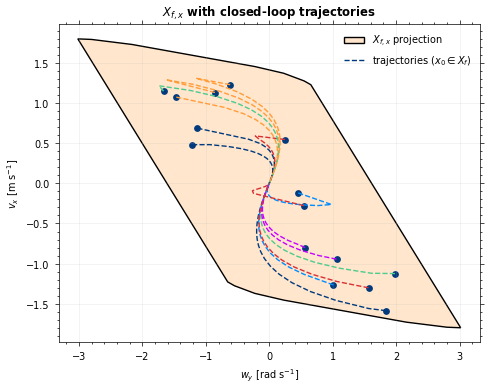

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from control import dlqr

# Build the final tuned x-velocity controller (you already do this)
mpc_x = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)
Xf_x  = mpc_x.Xf

# Recover the reduced discrete model used by this MPC (same as MPCControl_base does)
# (This avoids guessing A_red/B_red shapes)
Ared = mpc_x.A
Bred = mpc_x.B

# Use the same Q,R as the controller and compute the same LQR K used for Xf
Q = mpc_x.Q
R = mpc_x.R
K, P, _ = dlqr(Ared, Bred, Q, R)
A_cl = Ared - Bred @ K

# --- Sample initial points inside Xf and simulate x_{k+1} = A_cl x_k ---
num_samples = 15
N_sim = 60  # number of steps to draw

# mpt4py: sample(n) -> array shape (n, dim)
x0_samples = Xf_x.sample(num_samples)

# Choose which 2D projection to plot (0,2) = (w_y, v_x) for x-subsystem
dims = (0, 2)
Xproj = Xf_x.projection(dims=dims)

fig, ax = plt.subplots(1, 1, figsize=(5.0, 4.0))

# Plot the terminal set projection
Xproj.plot(ax, color="#ff9d3a", opacity=0.25, show_vertices=False, label=r"$X_{f,x}$ projection")

# Plot trajectories
for i in range(num_samples):
    x = x0_samples[i].copy()
    traj = np.zeros((mpc_x.nx, N_sim))
    traj[:, 0] = x
    for k in range(N_sim - 1):
        traj[:, k+1] = A_cl @ traj[:, k]

    label = r"trajectories ($x_0 \in X_f$)" if i == 0 else None
    ax.plot(traj[dims[0], :], traj[dims[1], :], linestyle="--", linewidth=1.0, label=label)

# Mark initial points
ax.scatter(x0_samples[:, dims[0]], x0_samples[:, dims[1]], s=15)

ax.set_xlabel(r"$w_y$ [rad s$^{-1}$]")
ax.set_ylabel(r"$v_x$ [m s$^{-1}$]")
ax.set_title(r"$X_{f,x}$ with closed-loop trajectories")
ax.legend()
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet converged

Iteration 11... not yet converged

Iteration 12... not yet converged

Iteration 13... not yet converged

Iteration 14... not yet converged

Iteration 15... not yet converged

Iteration 16... not yet converged

Iteration 17... not yet converged

Maximum invariant set successfully computed after 18 iterations.


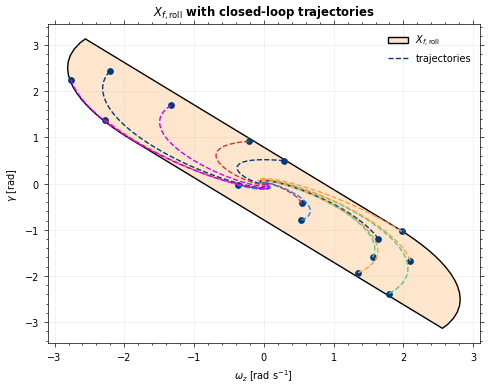

In [12]:
mpc_r = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)
Xf_r  = mpc_r.Xf

Ared = mpc_r.A
Bred = mpc_r.B
Q = mpc_r.Q
R = mpc_r.R
K, _, _ = dlqr(Ared, Bred, Q, R)
A_cl = Ared - Bred @ K

num_samples = 15
N_sim = 80
x0_samples = Xf_r.sample(num_samples)

fig, ax = plt.subplots(1, 1, figsize=(5.0, 4.0))
Xf_r.plot(ax, color="#ff9d3a", opacity=0.25, show_vertices=False, label=r"$X_{f,\mathrm{roll}}$")

for i in range(num_samples):
    x = x0_samples[i].copy()
    traj = np.zeros((mpc_r.nx, N_sim))
    traj[:, 0] = x
    for k in range(N_sim-1):
        traj[:, k+1] = A_cl @ traj[:, k]
    ax.plot(traj[0, :], traj[1, :], "--", linewidth=1.0, label=("trajectories" if i==0 else None))

ax.scatter(x0_samples[:, 0], x0_samples[:, 1], s=15)
ax.set_xlabel(r"$\omega_z$ [rad s$^{-1}$]")
ax.set_ylabel(r"$\gamma$ [rad]")
ax.set_title(r"$X_{f,\mathrm{roll}}$ with closed-loop trajectories")
ax.legend()
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet co

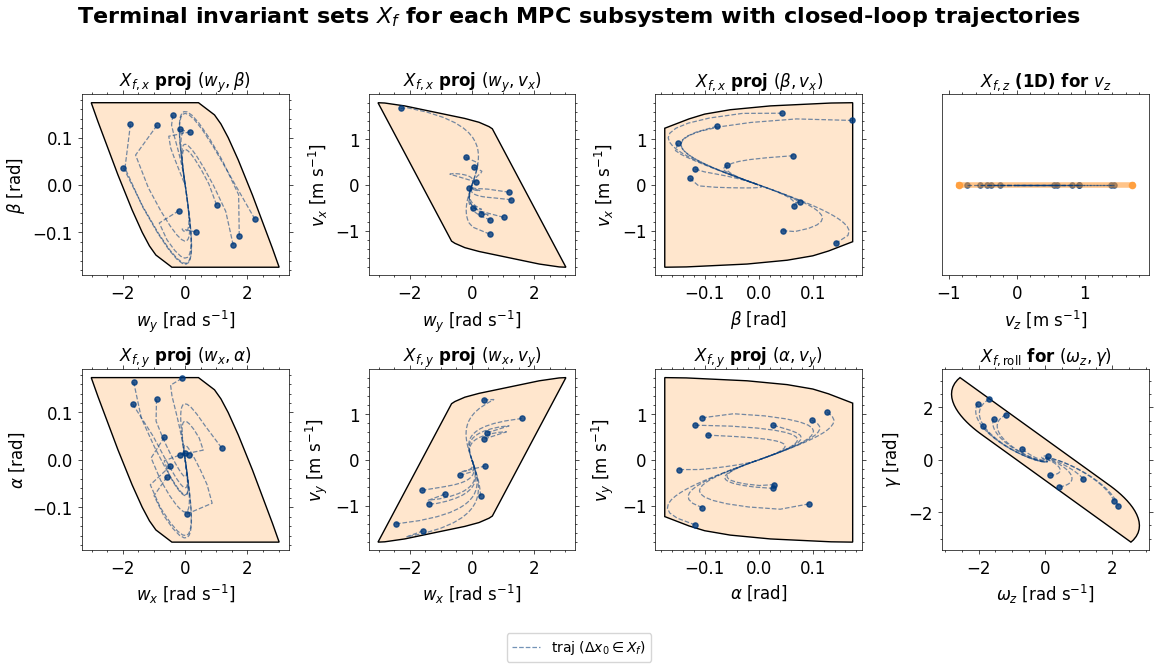

In [13]:
import numpy as np
from control import dlqr

# ----- trajectory overlay helpers -----
TRAJ_COLOR = "#003a7d"
TRAJ_ALPHA = 0.55
TRAJ_LW    = 0.9
NUM_SAMPLES = 12
N_SIM = 60  # number of closed-loop steps shown

def lqr_acl(mpc):
    """Return A_cl = A - B K for the *same* discrete reduced model used in the MPC."""
    Q = getattr(mpc, "Q", np.eye(mpc.nx))
    R = getattr(mpc, "R", np.eye(mpc.nu))
    K, _, _ = dlqr(mpc.A, mpc.B, Q, R)
    return mpc.A - mpc.B @ K

def overlay_trajs_on_projection(ax, Xf, A_cl, dims, num_samples=NUM_SAMPLES, N_sim=N_SIM):
    """
    Plot trajectories Δx_{k+1}=A_cl Δx_k with Δx_0 sampled from Xf,
    and overlay them on the projection (dims) in the given axis.
    """
    # sample Δx0 inside terminal set (delta-space!)
    x0s = Xf.sample(num_samples)  # (num_samples, nx)

    for i in range(num_samples):
        traj = np.zeros((Xf.dim, N_sim))
        traj[:, 0] = x0s[i]
        for k in range(N_sim - 1):
            traj[:, k+1] = A_cl @ traj[:, k]

        label = r"traj ($\Delta x_0 \in X_f$)" if i == 0 else None
        ax.plot(traj[dims[0], :], traj[dims[1], :],
                linestyle="--", linewidth=TRAJ_LW,
                alpha=TRAJ_ALPHA, color=TRAJ_COLOR, label=label)

    # mark initial points in the projection
    ax.scatter(x0s[:, dims[0]], x0s[:, dims[1]], s=14, color=TRAJ_COLOR, alpha=0.8)

def overlay_trajs_1d(ax, Xf_1d, A_cl_scalar, num_samples=NUM_SAMPLES, N_sim=N_SIM):
    """
    1D case: Δx⁺ = a_cl * Δx. Plot time evolution as points along the interval line.
    """
    x0s = Xf_1d.sample(num_samples).reshape(-1)  # (num_samples,)
    for i in range(num_samples):
        x = x0s[i]
        traj = np.zeros(N_sim)
        traj[0] = x
        for k in range(N_sim - 1):
            traj[k+1] = A_cl_scalar * traj[k]

        label = r"traj ($\Delta x_0 \in X_f$)" if i == 0 else None
        ax.plot(traj, np.zeros_like(traj),
                linestyle="--", linewidth=TRAJ_LW,
                alpha=TRAJ_ALPHA, color=TRAJ_COLOR, label=label)

    ax.scatter(x0s, np.zeros_like(x0s), s=14, color=TRAJ_COLOR, alpha=0.8)


# ----- compute closed-loop matrices (delta dynamics) -----
Acl_x = lqr_acl(mpc_x)
Acl_y = lqr_acl(mpc_y)
Acl_r = lqr_acl(mpc_r)

# z is 1D reduced model (your z subsystem is just v_z), so Acl_z is 1x1
Acl_z = lqr_acl(mpc_z)
a_cl_z = float(Acl_z.reshape(1,1)[0,0])

# Plot invariant sets of the final tuned x-velocity MPC controller

mpc_x = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)
mpc_y = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)
mpc_z = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)
mpc_r = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)

Xf_x = mpc_x.Xf
Xf_y = mpc_y.Xf
Xf_z = mpc_z.Xf
Xf_r = mpc_r.Xf

# colors from your palette
COL_XF = "#ff9d3a"   # orange for Xf
ALPHA  = 0.25
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 12
TITLE_SIZE = 12

def plot_poly(ax, P, color=COL_XF, alpha=ALPHA, label=None):
    # mpt4py uses "opacity" rather than alpha
    P.plot(ax, color=color, opacity=alpha, show_vertices=False, label=label)

def plot_1d_interval(ax, P1d, label=None, color=COL_XF):
    """
    Robust 1D plotting: compute bounds from H-rep (A x <= b) assuming bounded interval.
    """
    A = P1d.A
    b = P1d.b

    # inequalities: a_i x <= b_i
    # For 1D, each row is scalar.
    # Upper bounds come from a>0: x <= b/a
    # Lower bounds come from a<0: x >= b/a (since a<0 flips)
    upper = []
    lower = []
    for ai, bi in zip(A.reshape(-1), b.reshape(-1)):
        if ai > 1e-12:
            upper.append(bi / ai)
        elif ai < -1e-12:
            lower.append(bi / ai)  # note ai negative -> bound is lower
    xmin = max(lower) if lower else -np.inf
    xmax = min(upper) if upper else  np.inf

    ax.plot([xmin, xmax], [0, 0], color=color, linewidth=4, alpha=0.6, label=label)
    ax.scatter([xmin, xmax], [0, 0], color=color, s=20, alpha=0.9)
    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlim(xmin - 0.1*abs(xmax-xmin), xmax + 0.1*abs(xmax-xmin))

# ---- figure layout: A4 landscape-ish
fig, axs = plt.subplots(2, 4, figsize=(11.69, 6.8))  # A4 wide

fig.suptitle("Terminal invariant sets $X_f$ for each MPC subsystem with closed-loop trajectories",
             fontsize=16, fontweight="bold", y=0.98)

# ===== X subsystem (3D) projections
axs[0,0].set_title(r"$X_{f,x}$ proj $(w_y,\beta)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,0], Xf_x.projection(dims=(0,1)))

axs[0,0].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[0,0].set_ylabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE)

axs[0,1].set_title(r"$X_{f,x}$ proj $(w_y,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,1], Xf_x.projection(dims=(0,2)))
axs[0,1].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[0,1].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[0,2].set_title(r"$X_{f,x}$ proj $(\beta,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,2], Xf_x.projection(dims=(1,2)))
axs[0,2].set_xlabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[0,2].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# X subsystem projections
overlay_trajs_on_projection(axs[0,0], Xf_x, Acl_x, dims=(0,1))
overlay_trajs_on_projection(axs[0,1], Xf_x, Acl_x, dims=(0,2))
overlay_trajs_on_projection(axs[0,2], Xf_x, Acl_x, dims=(1,2))

# ===== Y subsystem (3D) projections
axs[1,0].set_title(r"$X_{f,y}$ proj $(w_x,\alpha)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,0], Xf_y.projection(dims=(0,1)))
axs[1,0].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,0].set_ylabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE)

axs[1,1].set_title(r"$X_{f,y}$ proj $(w_x,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,1], Xf_y.projection(dims=(0,2)))
axs[1,1].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,1].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[1,2].set_title(r"$X_{f,y}$ proj $(\alpha,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,2], Xf_y.projection(dims=(1,2)))
axs[1,2].set_xlabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[1,2].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# Y subsystem projections
overlay_trajs_on_projection(axs[1,0], Xf_y, Acl_y, dims=(0,1))
overlay_trajs_on_projection(axs[1,1], Xf_y, Acl_y, dims=(0,2))
overlay_trajs_on_projection(axs[1,2], Xf_y, Acl_y, dims=(1,2))

# ===== Z subsystem (1D) interval
axs[0,3].set_title(r"$X_{f,z}$ (1D) for $v_z$", fontweight="bold", fontsize=TITLE_SIZE)
plot_1d_interval(axs[0,3], Xf_z, label=r"$X_{f,z}$")
axs[0,3].set_xlabel(r"$v_z$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

# Z subsystem 1D
overlay_trajs_1d(axs[0,3], Xf_z, a_cl_z)

# ===== Roll subsystem (2D)
axs[1,3].set_title(r"$X_{f,\mathrm{roll}}$ for $(\omega_z,\gamma)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,3], Xf_r, label=r"$X_{f,\mathrm{roll}}$")
axs[1,3].set_xlabel(r"$\omega_z$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,3].set_ylabel(r"$\gamma$ [rad]", fontsize=AXIS_LABEL_SIZE)

# Roll subsystem 2D (already 2D)
overlay_trajs_on_projection(axs[1,3], Xf_r, Acl_r, dims=(0,1))

# cosmetics
for ax in axs.ravel():
    ax.tick_params(labelsize=TICK_LABEL_SIZE)

# Optional: show legend only once (cleaner)
# Comment this out if you want per-axis legends.
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=True, fontsize=10)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
fig.savefig("terminal_sets_with_trajs_a4wide.pdf", bbox_inches="tight")
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from MPCVelControl_D3_1 import MPCVelControl

# --- build your final tuned full MPC ---
mpc = MPCVelControl().new_controller(rocket, Ts, H)   # uses *_tuned_final inside

# initial condition: vx=vy=vz=5 m/s
x0 = xs.copy()
x0[6] += 5.0
x0[7] += 5.0
x0[8] += 5.0
x0[5] += np.deg2rad(30.0)

K_steps = int(sim_time / Ts)

x_cl = np.zeros((12, K_steps+1))
u_cl = np.zeros((4,  K_steps))

# store open-loop predictions at each step
# x_ol_hist[k] has shape (12, N+1)
x_ol_hist = []
t_ol_hist = []

x_cl[:, 0] = x0
t = 0.0
for k in range(K_steps):
    u0, x_ol, u_ol, t_ol = mpc.get_u(t, x_cl[:, k])  # x_ol is 12 x (N+1) (absolute)
    u_cl[:, k] = u0
    x_ol_hist.append(x_ol)
    t_ol_hist.append(t_ol)

    # advance closed-loop (linear model for consistency with your MPC design)
    x_cl[:, k+1] = rocket.simulate_step(x_cl[:, k], Ts, u0, method="linear")
    t += Ts

t_cl = np.arange(K_steps+1) * Ts


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet co

/Users/mt/opt/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Maximum invariant set successfully computed after 8 iterations.
Maximum invariant set successfully computed after 1 iterations.
Iteration 1... not yet converged

Iteration 2... not yet converged

Iteration 3... not yet converged

Iteration 4... not yet converged

Iteration 5... not yet converged

Iteration 6... not yet converged

Iteration 7... not yet converged

Iteration 8... not yet converged

Iteration 9... not yet converged

Iteration 10... not yet co

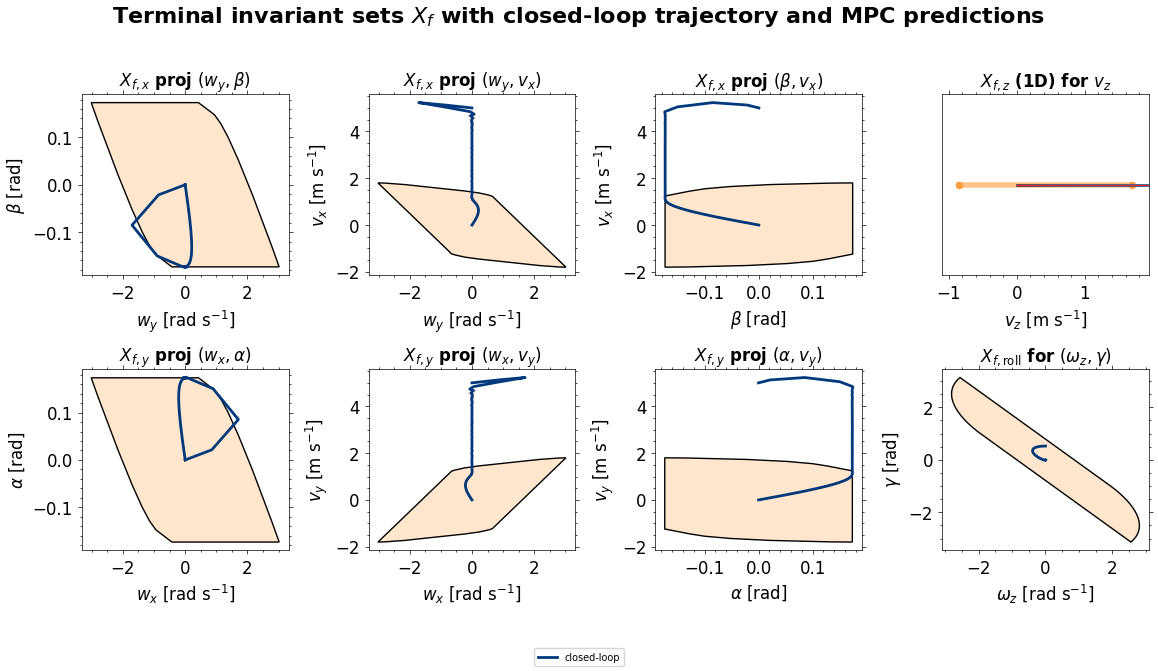

In [15]:
# ---- get the final-tuned terminal sets (delta-space!) ----
mpc_x = MPCControl_xvel_tuned_final(A, B, xs, us, Ts, H)
mpc_y = MPCControl_yvel_tuned_final(A, B, xs, us, Ts, H)
mpc_z = MPCControl_zvel_tuned_final(A, B, xs, us, Ts, H)
mpc_r = MPCControl_roll_tuned_final(A, B, xs, us, Ts, H)

Xf_x, Xf_y, Xf_z, Xf_r = mpc_x.Xf, mpc_y.Xf, mpc_z.Xf, mpc_r.Xf

COL_XF = "#ff9d3a"
ALPHA  = 0.25
AXIS_LABEL_SIZE = 12
TICK_LABEL_SIZE = 12
TITLE_SIZE = 12


# --- plotting helpers ---
def plot_poly(ax, P, color=COL_XF, alpha=ALPHA, label=None):
    P.plot(ax, color=color, opacity=alpha, show_vertices=False, label=label)

def plot_1d_interval(ax, P1d, label=None, color=COL_XF):
    A = P1d.A.reshape(-1)
    b = P1d.b.reshape(-1)
    upper, lower = [], []
    for ai, bi in zip(A, b):
        if ai > 1e-12:   upper.append(bi / ai)
        if ai < -1e-12:  lower.append(bi / ai)
    xmin = max(lower) if lower else -np.inf
    xmax = min(upper) if upper else  np.inf

    ax.plot([xmin, xmax], [0, 0], color=color, linewidth=4, alpha=0.6, label=label)
    ax.scatter([xmin, xmax], [0, 0], color=color, s=20, alpha=0.9)
    ax.set_ylim(-1, 1); ax.set_yticks([])
    ax.set_xlim(xmin - 0.1*abs(xmax-xmin), xmax + 0.1*abs(xmax-xmin))

def delta_sub_traj(full_traj, mpc_sub):
    """Convert a full (12, T) ABSOLUTE trajectory to reduced DELTA trajectory (nx, T)."""
    return full_traj[mpc_sub.x_ids, :] - mpc_sub.xs[:, None]

def overlay_predictions(ax, mpc_sub, dims, color="#d83034", alpha=0.25, lw=0.8):
    """Overlay all open-loop predictions on a given 2D projection."""
    for k, x_ol in enumerate(x_ol_hist):
        dx_ol = delta_sub_traj(x_ol, mpc_sub)     # (nx, N+1) in delta space
        ax.plot(dx_ol[dims[0], :], dx_ol[dims[1], :], color=color, alpha=alpha, linewidth=lw)

def overlay_closedloop(ax, mpc_sub, dims, color="#003a7d", lw=2.0, label="closed-loop"):
    """Overlay closed-loop trajectory on a given 2D projection."""
    dx_cl = delta_sub_traj(x_cl, mpc_sub)         # (nx, K+1) in delta space
    ax.plot(dx_cl[dims[0], :], dx_cl[dims[1], :], color=color, linewidth=lw, label=label)

# ---- figure layout ----
fig, axs = plt.subplots(2, 4, figsize=(11.69, 6.8))
fig.suptitle("Terminal invariant sets $X_f$ with closed-loop trajectory and MPC predictions",
             fontsize=16, fontweight="bold", y=0.98)

# ===== X subsystem projections (dims refer to reduced order: [w_y, beta, v_x])
axs[0,0].set_title(r"$X_{f,x}$ proj $(w_y,\beta)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,0], Xf_x.projection(dims=(0,1)))
overlay_predictions(axs[0,0], mpc_x, dims=(0,1))
overlay_closedloop(axs[0,0], mpc_x, dims=(0,1))

axs[0,1].set_title(r"$X_{f,x}$ proj $(w_y,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,1], Xf_x.projection(dims=(0,2)))
overlay_predictions(axs[0,1], mpc_x, dims=(0,2))
overlay_closedloop(axs[0,1], mpc_x, dims=(0,2))

axs[0,2].set_title(r"$X_{f,x}$ proj $(\beta,v_x)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[0,2], Xf_x.projection(dims=(1,2)))
overlay_predictions(axs[0,2], mpc_x, dims=(1,2))
overlay_closedloop(axs[0,2], mpc_x, dims=(1,2))

# ===== Y subsystem projections (dims refer to reduced order: [w_x, alpha, v_y])
axs[1,0].set_title(r"$X_{f,y}$ proj $(w_x,\alpha)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,0], Xf_y.projection(dims=(0,1)))
overlay_predictions(axs[1,0], mpc_y, dims=(0,1))
overlay_closedloop(axs[1,0], mpc_y, dims=(0,1))

axs[1,1].set_title(r"$X_{f,y}$ proj $(w_x,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,1], Xf_y.projection(dims=(0,2)))
overlay_predictions(axs[1,1], mpc_y, dims=(0,2))
overlay_closedloop(axs[1,1], mpc_y, dims=(0,2))

axs[1,2].set_title(r"$X_{f,y}$ proj $(\alpha,v_y)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,2], Xf_y.projection(dims=(1,2)))
overlay_predictions(axs[1,2], mpc_y, dims=(1,2))
overlay_closedloop(axs[1,2], mpc_y, dims=(1,2))

# ===== Z subsystem (1D): v_z interval + show closed-loop/predictions along the line
axs[0,3].set_title(r"$X_{f,z}$ (1D) for $v_z$", fontweight="bold", fontsize=TITLE_SIZE)
plot_1d_interval(axs[0,3], Xf_z, label=r"$X_{f,z}$")

# closed-loop v_z points on the line
dxz_cl = (x_cl[mpc_z.x_ids, :] - mpc_z.xs[:, None]).reshape(-1)
axs[0,3].plot(dxz_cl, np.zeros_like(dxz_cl), color="tab:blue", linewidth=2.0)

# open-loop predictions at each step
for x_ol in x_ol_hist:
    dxz_ol = (x_ol[mpc_z.x_ids, :] - mpc_z.xs[:, None]).reshape(-1)
    axs[0,3].plot(dxz_ol, np.zeros_like(dxz_ol), color="tab:red", alpha=0.25, linewidth=0.8)

# ===== Roll subsystem (2D): reduced order [w_z, gamma]
axs[1,3].set_title(r"$X_{f,\mathrm{roll}}$ for $(\omega_z,\gamma)$", fontweight="bold", fontsize=TITLE_SIZE)
plot_poly(axs[1,3], Xf_r, label=r"$X_{f,\mathrm{roll}}$")
overlay_predictions(axs[1,3], mpc_r, dims=(0,1))
overlay_closedloop(axs[1,3], mpc_r, dims=(0,1))

# labels (keep yours)
axs[0,0].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE); axs[0,0].set_ylabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[0,1].set_xlabel(r"$w_y$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE); axs[0,1].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[0,2].set_xlabel(r"$\beta$ [rad]", fontsize=AXIS_LABEL_SIZE);       axs[0,2].set_ylabel(r"$v_x$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[1,0].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE); axs[1,0].set_ylabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE)
axs[1,1].set_xlabel(r"$w_x$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE); axs[1,1].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)
axs[1,2].set_xlabel(r"$\alpha$ [rad]", fontsize=AXIS_LABEL_SIZE);       axs[1,2].set_ylabel(r"$v_y$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[0,3].set_xlabel(r"$v_z$ [m s$^{-1}$]", fontsize=AXIS_LABEL_SIZE)

axs[1,3].set_xlabel(r"$\omega_z$ [rad s$^{-1}$]", fontsize=AXIS_LABEL_SIZE); axs[1,3].set_ylabel(r"$\gamma$ [rad]", fontsize=AXIS_LABEL_SIZE)

# one legend (closed-loop label comes from first axis)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=True)

# cosmetics
for ax in axs.ravel():
    ax.tick_params(labelsize=TICK_LABEL_SIZE)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
fig.savefig("terminal_sets_with_cl_and_ol_predictions.pdf", bbox_inches="tight")
plt.show()
